In [1]:
import tqdm as tqdm
import torch
import numpy
from utils.head import ensemble
from utils.dataset import load_compiled_data, ObjectDetectorDataset
from torch.utils.data import DataLoader
import torch.nn as nn

from utils.head import *

aircraft-detection custom utils


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
input_reg_weights_path = ['models/head/reg_camera_1.pt', 'models/head/reg_camera_2.pt']
sequential_de_weights_path = 'models/head/sequential_de_random_training.pt'
model = ensemble(input_reg_weights_path = input_reg_weights_path, sequential_de_weights_path = sequential_de_weights_path, device = device)

In [23]:
norm_offset = [[20.7227, 271.4375,   9.0000,   5.5000], [5.3496, 248.5000,  10.1094,   4.5000]]
norm_divider = [[1894.2773,  798.0625,  174.2500,   67.5000], [1908.6504,  396.5000,   99.8906,   42.5000]]

test_data = load_compiled_data(ts=[1,2,3,4,5],ws=[1],rs=[1,2,3], inference_mode = True, convert = True,  offset = norm_offset, divider = norm_divider, device = device)

available_detection = torch.logical_and(torch.all(test_data['x'][0] != 0, dim = 1), torch.all(test_data['x'][1] != 1, dim = 1))
test_data['x'] = test_data['x'][:, available_detection]
test_data['y'] = test_data['y'][:, available_detection]
y_pred = model(test_data['x'])

Data Statistic:
            Camera 1:
            Mean: [0.15418151021003723, 0.08940913528203964, 0.20075751841068268, 0.14852353930473328]
            Std : [0.23807215690612793, 0.11530411243438721, 0.23584815859794617, 0.21514953672885895]
            
            Camera 2:
            Mean: [0.2229878455400467, 0.2593661844730377, 0.28752636909484863, 0.2103947401046753]
            Std : [0.2556403577327728, 0.2115294337272644, 0.25217360258102417, 0.23093342781066895]
            


100%|███████████████████████████████████| 60187/60187 [00:27<00:00, 2166.93it/s]


Mean Absolute % Error : 0.15433908998966217 %
Max % Error           : 2.0200068950653076 %


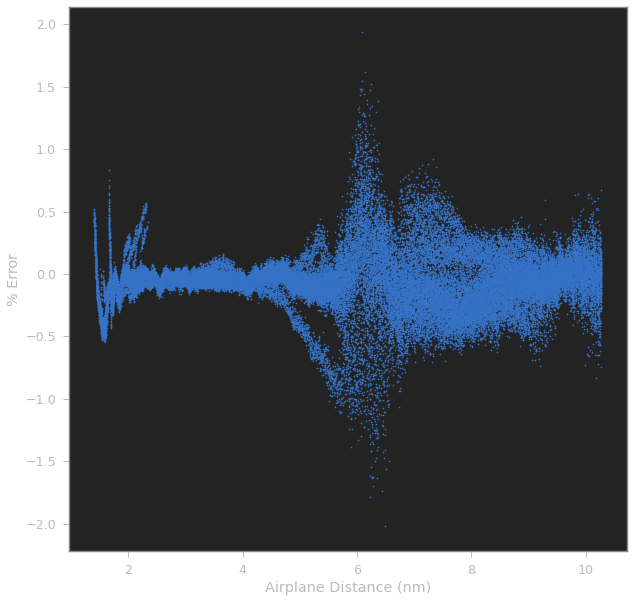

In [24]:
model.plot_error(y_pred, test_data['y'][0][:, 0])